In [1]:
import yfinance as yf

df = yf.download('AAPL', start= '2023-05-01', end= '2025-07-23')
df

C:\Users\hp\AppData\Local\Temp\ipykernel_19812\1811423646.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start= '2023-05-01', end= '2025-07-23')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-05-01,167.676926,168.527225,166.737645,167.370425,52472900
2023-05-02,166.638794,168.428389,165.650074,168.171312,48425700
2023-05-03,165.561096,168.991954,165.274374,167.587974,65136000
2023-05-04,163.919800,165.155699,162.456499,163.029958,81235400
2023-05-05,171.612030,172.333791,168.833716,169.051235,113453200
...,...,...,...,...,...
2025-07-16,210.160004,212.399994,208.639999,210.300003,47490500
2025-07-17,210.020004,211.800003,209.589996,210.570007,48068100


In [9]:
print(df.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


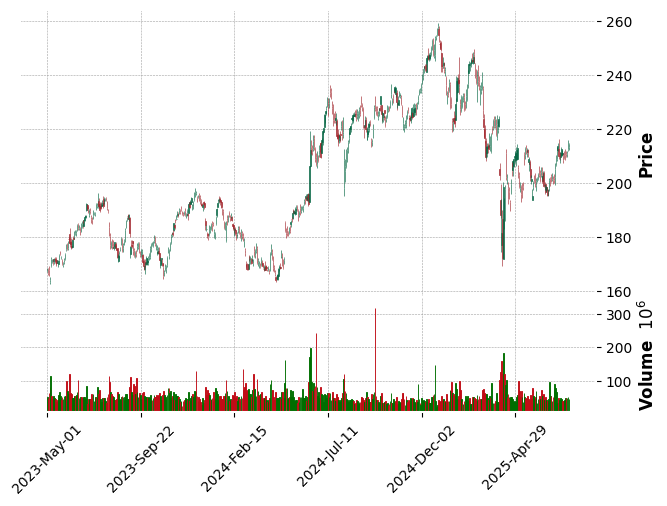

In [11]:
df_aapl= df.xs('AAPL', axis=1, level='Ticker')
df_aapl.dropna(inplace= True)
import pandas as pd
df_aapl.index=pd.to_datetime(df_aapl.index)
df_aapl
import mplfinance as mpf
mpf.plot(df_aapl, type='candle', style='charles', volume= True)

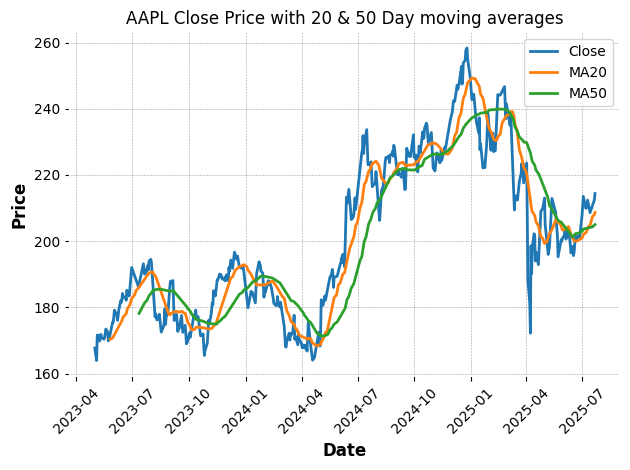

In [19]:
df_aapl['MA20']=df_aapl["Close"].rolling(20).mean()
df_aapl['MA50']=df_aapl["Close"].rolling(50).mean()
import matplotlib.pyplot as plt
plt.plot(df_aapl['Close'], label= 'Close')
plt.plot(df_aapl['MA20'], label = 'MA20')
plt.plot(df_aapl['MA50'], label = 'MA50')
plt.legend()
plt.xticks(rotation =45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Close Price with 20 & 50 Day moving averages")
plt.tight_layout()
plt.show()

In [32]:
tickers=['AAPL','MSFT','GOOGL', 'AMZN', 'META']
import pandas as pd
import yfinance as yf
df=yf.download(tickers, start='2023-06-01', end='2025-07-22')
close_df = df['Close']
close_df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_19812\776898141.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(tickers, start='2023-06-01', end='2025-07-22')
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2023-06-01,178.304764,122.769997,122.982422,271.122559,327.487732
2023-06-02,179.156250,124.250000,123.926765,271.122559,330.264496
2023-06-05,177.799835,125.300003,125.258789,269.909302,330.796265
2023-06-06,177.433472,126.610001,126.551033,269.640717,328.570831
2023-06-07,176.057297,121.230003,121.769699,262.161774,318.428589


In [26]:
df.columns

MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',  'AMZN'),
            ( 'Close', 'GOOGL'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            (  'High',  'AAPL'),
            (  'High',  'AMZN'),
            (  'High', 'GOOGL'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (   'Low',  'AAPL'),
            (   'Low',  'AMZN'),
            (   'Low', 'GOOGL'),
            (   'Low',  'META'),
            (   'Low',  'MSFT'),
            (  'Open',  'AAPL'),
            (  'Open',  'AMZN'),
            (  'Open', 'GOOGL'),
            (  'Open',  'META'),
            (  'Open',  'MSFT'),
            ('Volume',  'AAPL'),
            ('Volume',  'AMZN'),
            ('Volume', 'GOOGL'),
            ('Volume',  'META'),
            ('Volume',  'MSFT')],
           names=['Price', 'Ticker'])

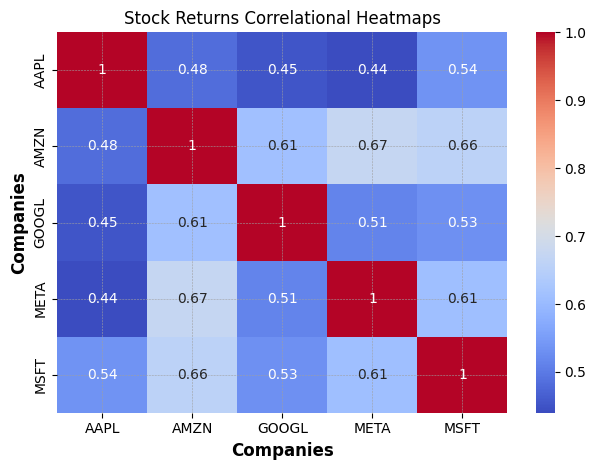

In [37]:
returns= close_df.pct_change().dropna()
correlation=returns.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation,annot=True, cmap='coolwarm' )
plt.title('Stock Returns Correlational Heatmaps')
plt.xlabel("Companies")
plt.ylabel("Companies")
plt.tight_layout()
plt.show()
